<p style="font-size:36px;text-align:center"> <b>Santander Customer Transaction Prediction</b> </p>

Santander mission is to help people and businesses prosper. We are always looking for ways to help our customers understand their financial health and identify which products and services might help them achieve their monetary goals.


<h1>1. Business Problem</h1>

<p> Source: https://www.kaggle.com/c/santander-customer-transaction-prediction/ </p>

<h6> Problem statement : </h6>
<p> To identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. </p>

<h2>Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.

<h1>2. Machine Learning Problem Formulation</h1>

<h3> Data Overview</h3>

- Source: https://www.kaggle.com/c/santander-customer-transaction-prediction/data
- We have an anonymized dataset containing numeric feature variables.
- The binary dependent column - Target.

<h3>Example Data Point</h3>

<h6>Dependent Features</h6>
<hr>

ID_code,var_0,var_1,var_2<br>
test_0	11.0656	7.7798	12.9536	 <br>
test_1	8.5304	1.2543	11.3047	 <br>
test_2	5.4827	-10.358 10.1407  <br>

<h6>Independent Feature</h6>
<hr>
Target<br>
1  <br>
1  <br>
0  <br>

<h2>Mapping the real-world problem to an ML problem</h2>

<h3>Type of Machine Learning Problem</h3>

<p>
    
       There are two different classes Customer Transaction can be classified into => Binary classification Problem.   
    
</p>

<h3>Performance Metric</h3>

Source: https://www.kaggle.com/c/santander-customer-transaction-prediction/overview/evaluation

Metric(s): 
* Area under the ROC curve
* Confusion matrix 


<h3>Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict which Customer will make the transaction
</p>
<p> Constraints:
</p>
* No Latency constraints.

** **

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import string

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

<h2>Reading Data</h2>

In [442]:
train_data = pd.read_csv("train.csv")

## Exploratory Data Analysis

In [443]:
print('Shape of train data: ', train_data.shape)

Shape of train data:  (200000, 202)


In [444]:
train_data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [445]:
train_data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [446]:
# There are no missing value
train_data.any().isnull().sum()

0

In [447]:
y_train = train_data['target']

train_data.drop("target", axis=1, inplace=True)
# train_data.drop("ID_code", axis=1, inplace=True)

In [448]:
train_data.columns

Index(['ID_code', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5',
       'var_6', 'var_7', 'var_8',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=201)

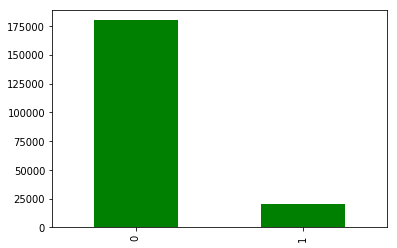

In [449]:
y_train.value_counts().plot.bar(color = 'green')

        1. As we can see the dataset is very much imbalanced.
        2. Number of customers who would make the transaction is very low as compared to customers who would not make.
        
<p style="color:rgb(0, 0, 255)">Santander is giving offers to many customers. But, the customers are not happy or do not want to take the offer. There could be many reasons behind this cause.</p>

In [450]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
train_data['ID_code'] = label_encoder.fit_transform(train_data['ID_code']) 

<h2>Feature Importance</h2>

In [451]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(random_state = 42)
model.fit(train_data,y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

<h3 style="color:rgb(170, 51, 106)"> Top 10 Features </h3>

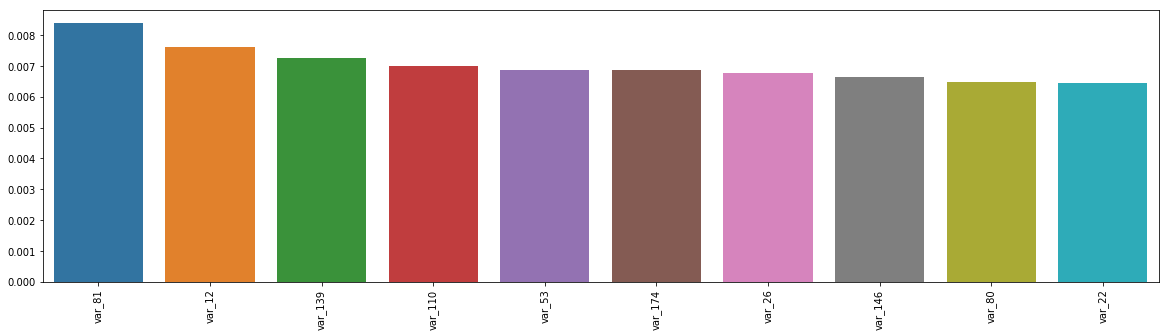

In [452]:
importances = model.feature_importances_
feature_names = train_data.columns
idx = np.argsort(importances)[::-1][0:10]

plt.figure(figsize=(20,5))
sns.barplot(x=feature_names[idx], y=importances[idx])
plt.xticks(rotation=90);

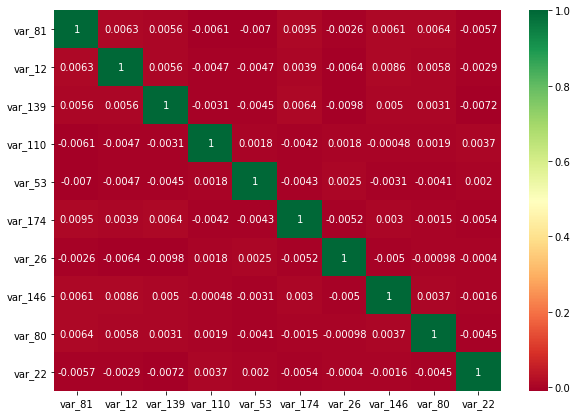

In [453]:
# get correlations of each feature in dataset
cor_heat = train_data[feature_names[idx]].corr()
top_corr_feat = cor_heat.index
# heatmap of correlation
plt.figure(figsize = (10,7))

sns.heatmap(train_data[top_corr_feat].corr(), annot = True, cmap = "RdYlGn")

    There is not much significant corelation between features.

<h3 style="color:rgb(120, 51, 146)"> Least 10 Features </h3>

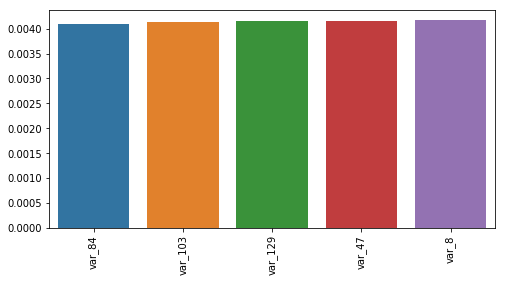

In [454]:
importances = model.feature_importances_
feature_names = train_data.columns
idx1 = np.argsort(importances)[0:5]

plt.figure(figsize=(8,4))
sns.barplot(x=feature_names[idx1], y=importances[idx1])
plt.xticks(rotation=90);

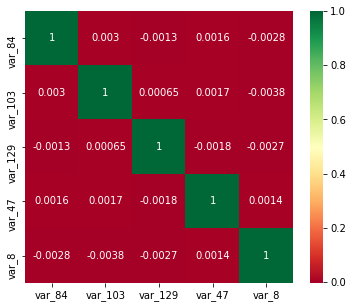

In [455]:
# get correlations of each feature in dataset
cor_heat = train_data[feature_names[idx1]].corr()
top_corr_feat = cor_heat.index
# heatmap of correlation
plt.figure(figsize = (6,5))

sns.heatmap(train_data[top_corr_feat].corr(), annot = True, cmap = "RdYlGn")

In [456]:
top = train_data.loc[:, feature_names[idx[0:5]]]
top.describe()

,var_81,var_12,var_139,var_110,var_53
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,14.719024,14.023978,7.760193,5.513238,6.008569
std,2.299567,0.190059,7.686433,3.823253,0.764753
min,7.586500,13.434600,-21.274300,-9.239800,3.344900
25%,13.214775,13.894000,2.387575,2.817475,5.435600
50%,14.844500,14.025500,8.066250,5.394300,6.027800
75%,16.340800,14.164200,13.232525,8.104325,6.542900
max,23.132400,14.654500,36.097100,19.519300,8.231500


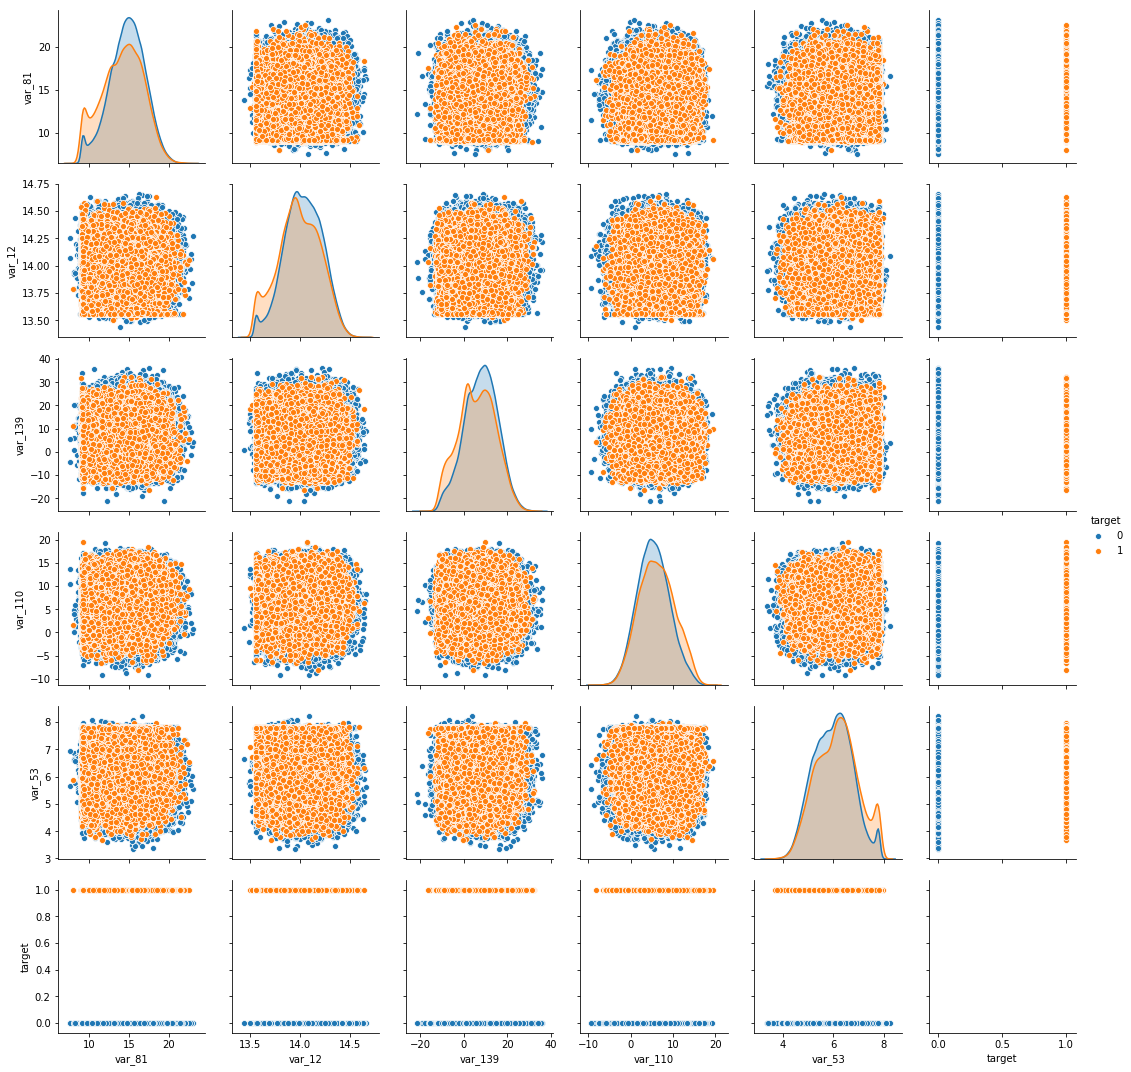

In [457]:
top = top.join(y_train)
sns.pairplot(top, hue="target")

<h3>Test and Train Split</h3>

<h4>Splitting data into train and test (70:30)</h4>

In [458]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data, y_train, stratify = y_train, test_size=0.30, random_state = 12)

In [459]:
print(X_train.shape)
print(X_test.shape)

(140000, 201)
(60000, 201)


<h2> Utility Function </h2>

In [469]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
#     print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

<h2>Baseline Model</h2>

In [462]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

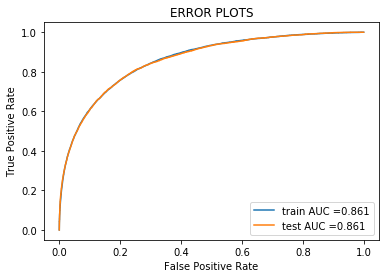

In [463]:
from sklearn.metrics import roc_curve, auc

train_fpr, train_tpr, train_thr = roc_curve(y_train, gnb.predict_proba(X_train)[:,1])
test_fpr, test_tpr, test_thr = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])


plt.plot(train_fpr, train_tpr, label="train AUC ="+str(round(auc(train_fpr, train_tpr),3)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(round(auc(test_fpr, test_tpr),3)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.show()

        - Test accuracy on a this model is 86%. The model is overfitting.

** **

** **

<h3>Gaussian Naive Bayes with hyperparameter tuning</h3>

    - We are considering var_smoothing

In [464]:
print("Hyperparameters of Gaussian NB",GaussianNB().get_params().keys())

Hyperparameters of Gaussian NB dict_keys(['priors', 'var_smoothing'])


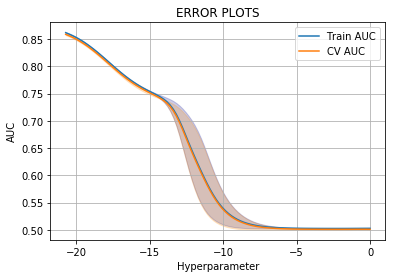

In [465]:
tuned_parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
model = GaussianNB()
clf = GridSearchCV(model, tuned_parameters, cv= 3 , scoring='roc_auc', return_train_score= True)
clf.fit(X_train, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(np.log(tuned_parameters['var_smoothing']), train_auc, label='Train AUC')
plt.gca().fill_between(np.log(tuned_parameters['var_smoothing']),train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')
plt.plot(np.log(tuned_parameters['var_smoothing']), cv_auc, label='CV AUC')
plt.fill_between(np.log(tuned_parameters['var_smoothing']),cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("Hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [466]:
clf.best_params_

{'var_smoothing': 1e-09}

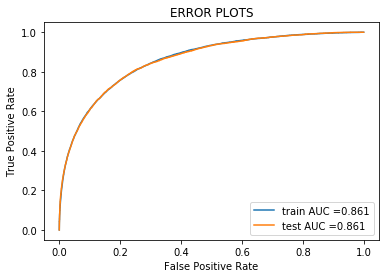

In [467]:
gnb = GaussianNB(var_smoothing = 1e-09)
gnb.fit(X_train, y_train)

train_fpr, train_tpr, train_thr = roc_curve(y_train, gnb.predict_proba(X_train)[:,1])
test_fpr, test_tpr, test_thr = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])


plt.plot(train_fpr, train_tpr, label="train AUC ="+str(round(auc(train_fpr, train_tpr),3)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(round(auc(test_fpr, test_tpr),3)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.show()

** **

** **

<h2>Logistic Regression</h2>

In [297]:
from sklearn.linear_model import LogisticRegression

In [478]:
warnings.filterwarnings("ignore")
tuned_parameters = {'C' : [1e-07, 1e-06,1e-05, 1e-04 ,0.001,0.01, 0.1], 'penalty' : ['l1','l2'] }
model = LogisticRegression(class_weight = 'balanced')
clf = GridSearchCV(model, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [479]:
clf.best_params_

{'C': 0.1, 'penalty': 'l2'}

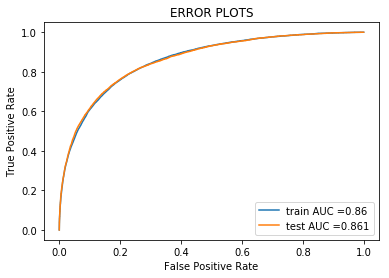

In [480]:
gnb = LogisticRegression(C = 0.1, penalty = 'l2', class_weight = 'balanced')
gnb.fit(X_train, y_train)

train_fpr, train_tpr, train_thr = roc_curve(y_train, gnb.predict_proba(X_train)[:,1])
test_fpr, test_tpr, test_thr = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])


plt.plot(train_fpr, train_tpr, label="train AUC ="+str(round(auc(train_fpr, train_tpr),3)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(round(auc(test_fpr, test_tpr),3)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.show()